# 자연어처리 과제 : RNN을 이용한 글자 생성
# 제출일 : 2021.11.28
# 2019312072 정주호 인공지능융합전공

#Text Generation with RNN

In [13]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [14]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [16]:
print(tokenizer.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [17]:
sequences = list()
for line in text.split('\n'): # Wn을 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [18]:
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [19]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [20]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [21]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [22]:
y = to_categorical(y, num_classes=vocab_size)

In [24]:
from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dense


model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_len-1))
model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 2.4525 - accuracy: 0.0909 - 941ms/epoch - 941ms/step
Epoch 2/200
1/1 - 0s - loss: 2.4396 - accuracy: 0.3636 - 6ms/epoch - 6ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4267 - accuracy: 0.3636 - 6ms/epoch - 6ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4134 - accuracy: 0.5455 - 4ms/epoch - 4ms/step
Epoch 5/200
1/1 - 0s - loss: 2.3997 - accuracy: 0.6364 - 6ms/epoch - 6ms/step
Epoch 6/200
1/1 - 0s - loss: 2.3856 - accuracy: 0.6364 - 4ms/epoch - 4ms/step
Epoch 7/200
1/1 - 0s - loss: 2.3708 - accuracy: 0.5455 - 6ms/epoch - 6ms/step
Epoch 8/200
1/1 - 0s - loss: 2.3554 - accuracy: 0.5455 - 4ms/epoch - 4ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3393 - accuracy: 0.5455 - 6ms/epoch - 6ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3223 - accuracy: 0.4545 - 6ms/epoch - 6ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3045 - accuracy: 0.4545 - 3ms/epoch - 3ms/step
Epoch 12/200
1/1 - 0s - loss: 2.2858 - accuracy: 0.4545 - 4ms/epoch - 4ms/step
Epoch 13/200
1/1 - 0s - loss: 2.2660 - accuracy: 0.4545 -

In [25]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [26]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [27]:
print(sentence_generation(model, tokenizer, '그의', 2))

그의 말이 법이다


In [28]:
print(sentence_generation(model, tokenizer, '가는', 5))

가는 말이 고와야 오는 말이 곱다


In [29]:
print(sentence_generation(model, tokenizer, '가는', 10))

가는 말이 고와야 오는 말이 곱다 오는 말이 곱다 오는 말이


# RNN과 LSTM의 차이점

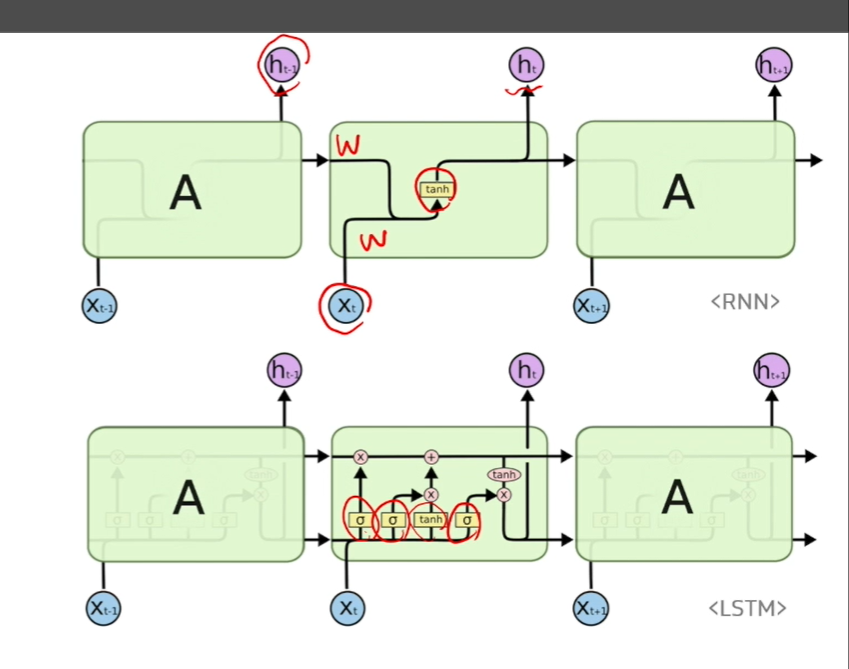

RNN : 히스토리가 길어질 수록 앞에서 봤던 데이터들은 잊어버리게된다


LSTM : RNN과 같은 구조이지만 시간이 지나도 처음 입력한 값을 다시 주기 때문에 잊지 않고 진행 

GATE를 추가로 둔다 : 얼마나 앞의 데이터를 기억해야하는지 정함


#Charater-based Text Generation wit LSTM

In [ ]:
model = Sequential()
model.add(LSTM(80, input_shape=(X.shape[1], X.shape[2]))) # X.shape[1]은 25, X.shape[2]는 33
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=2)

#글자 단위 RNN(Char RNN)으로 텍스트 생성하기

In [30]:
import numpy as np
from tensorflow.keras.utils import to_categorical

In [31]:
raw_text = '''
I get on with life as a programmer,
I like to contemplate beer.
But when I start to daydream,
My mind turns straight to wine.

Do I love wine more than beer?

I like to use words about beer.
But when I stop my talking,
My mind turns straight to wine.

I hate bugs and errors.
But I just think back to wine,
And I'm happy once again.

I like to hang out with programming and deep learning.
But when left alone,
My mind turns straight to wine.
'''

In [32]:
tokens = raw_text.split()
raw_text = ' '.join(tokens)
print(raw_text)

I get on with life as a programmer, I like to contemplate beer. But when I start to daydream, My mind turns straight to wine. Do I love wine more than beer? I like to use words about beer. But when I stop my talking, My mind turns straight to wine. I hate bugs and errors. But I just think back to wine, And I'm happy once again. I like to hang out with programming and deep learning. But when left alone, My mind turns straight to wine.


In [33]:
# 중복을 제거한 글자 집합 생성
char_vocab = sorted(list(set(raw_text)))
print(char_vocab)

[' ', "'", ',', '.', '?', 'A', 'B', 'D', 'I', 'M', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']


In [34]:
vocab_size = len(char_vocab)
print ('글자 집합의 크기 : {}'.format(vocab_size))

글자 집합의 크기 : 33


In [35]:
char_to_index = dict((char, index) for index, char in enumerate(char_vocab)) # 글자에 고유한 정수 인덱스 부여
print(char_to_index)

{' ': 0, "'": 1, ',': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'D': 7, 'I': 8, 'M': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'y': 32}


In [37]:
length = 11
sequences = []
for i in range(length, len(raw_text)):
    seq = raw_text[i-length:i] # 길이 11의 문자열을 지속적으로 만든다.
    sequences.append(seq)
print('총 훈련 샘플의 수: %d' % len(sequences))

총 훈련 샘플의 수: 426


In [38]:
sequences[:10]

['I get on wi',
 ' get on wit',
 'get on with',
 'et on with ',
 't on with l',
 ' on with li',
 'on with lif',
 'n with life',
 ' with life ',
 'with life a']

In [39]:
encoded_sequences = []
for sequence in sequences: # 전체 데이터에서 문장 샘플을 1개씩 꺼낸다.
    encoded_sequence = [char_to_index[char] for char in sequence] # 문장 샘플에서 각 글자에 대해서 정수 인코딩을 수행.
    encoded_sequences.append(encoded_sequence)

In [40]:
encoded_sequences[:5]

[[8, 0, 16, 14, 28, 0, 24, 23, 0, 31, 18],
 [0, 16, 14, 28, 0, 24, 23, 0, 31, 18, 28],
 [16, 14, 28, 0, 24, 23, 0, 31, 18, 28, 17],
 [14, 28, 0, 24, 23, 0, 31, 18, 28, 17, 0],
 [28, 0, 24, 23, 0, 31, 18, 28, 17, 0, 21]]

In [41]:
encoded_sequences = np.array(encoded_sequences)
X_data = encoded_sequences[:,:-1]

# 맨 마지막 위치의 글자를 분리
y_data = encoded_sequences[:,-1]

In [42]:
# 원-핫 인코딩
X_data_one_hot = [to_categorical(encoded, num_classes=vocab_size) for encoded in X_data]
X_data_one_hot = np.array(X_data_one_hot)
y_data_one_hot = to_categorical(y_data, num_classes=vocab_size)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
hidden_units = 64

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(X_data_one_hot.shape[1], X_data_one_hot.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_data_one_hot, y_data_one_hot, epochs=100, verbose=2)

Epoch 1/100
14/14 - 2s - loss: 3.4746 - accuracy: 0.0751 - 2s/epoch - 148ms/step
Epoch 2/100
14/14 - 0s - loss: 3.3879 - accuracy: 0.1808 - 82ms/epoch - 6ms/step
Epoch 3/100
14/14 - 0s - loss: 3.1582 - accuracy: 0.1972 - 86ms/epoch - 6ms/step
Epoch 4/100
14/14 - 0s - loss: 3.0100 - accuracy: 0.1972 - 82ms/epoch - 6ms/step
Epoch 5/100
14/14 - 0s - loss: 2.9688 - accuracy: 0.1972 - 87ms/epoch - 6ms/step
Epoch 6/100
14/14 - 0s - loss: 2.9468 - accuracy: 0.1972 - 85ms/epoch - 6ms/step
Epoch 7/100
14/14 - 0s - loss: 2.9225 - accuracy: 0.1972 - 91ms/epoch - 7ms/step
Epoch 8/100
14/14 - 0s - loss: 2.9076 - accuracy: 0.1972 - 83ms/epoch - 6ms/step
Epoch 9/100
14/14 - 0s - loss: 2.8913 - accuracy: 0.1972 - 83ms/epoch - 6ms/step
Epoch 10/100
14/14 - 0s - loss: 2.8648 - accuracy: 0.1972 - 95ms/epoch - 7ms/step
Epoch 11/100
14/14 - 0s - loss: 2.8418 - accuracy: 0.2019 - 81ms/epoch - 6ms/step
Epoch 12/100
14/14 - 0s - loss: 2.8079 - accuracy: 0.1972 - 94ms/epoch - 7ms/step
Epoch 13/100
14/14 - 0s -

In [46]:
def sentence_generation(model, char_to_index, seq_length, seed_text, n):

    # 초기 시퀀스
    init_text = seed_text
    sentence = ''

    for _ in range(n):
        encoded = [char_to_index[char] for char in seed_text] # 현재 시퀀스에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=seq_length, padding='pre') # 데이터에 대한 패딩
        encoded = to_categorical(encoded, num_classes=len(char_to_index))

        # 입력한 X(현재 시퀀스)에 대해서 y를 예측하고 y(예측한 글자)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for char, index in char_to_index.items():
            if index == result:
                break

        # 현재 시퀀스 + 예측 글자를 현재 시퀀스로 변경
        seed_text = seed_text + char

        # 예측 글자를 문장에 저장
        sentence = sentence + char

    sentence = init_text + sentence
    return sentence

In [47]:
print(sentence_generation(model, char_to_index, 10, 'I get on w', 80))

I get on with life as a programmer, I like to use words about beer. But when I stap mt taa


#글자 단위 RNN 언어 모델(Char RNNLM)

In [1]:
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical

In [59]:
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")
f = open('11-0.txt', 'rb')

sentences =[]
for sentence in f:
  sentence = sentence.strip()
  sentence = sentence.lower()
  sentence = sentence.decode('ascii','ignore')

  if len(sentence)>0:
    sentences.append(sentence)

f.close()

#문장을 전처리한 후 sentences 이름의 리스트에 저장. 

In [60]:
sentences[:5]

['the project gutenberg ebook of alices adventures in wonderland, by lewis carroll',
 'this ebook is for the use of anyone anywhere in the united states and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. you may copy it, give it away or re-use it under the terms',
 'of the project gutenberg license included with this ebook or online at']

In [64]:
total_data = ' '.join(sentences)
print('문자열의 길이 또는 총 글자의 개수 : %d' %len(total_data))
#하나의 문자열로 통합하였다.

문자열의 길이 또는 총 글자의 개수 : 159484


In [62]:
print(total_data[:200])

the project gutenberg ebook of alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with


In [65]:

char_vocab = sorted(list(set(total_data)))
vocab_size = len(char_vocab)
print ('글자 집합의 크기 : {}'.format(vocab_size))

글자 집합의 크기 : 56


In [66]:
char_to_index = dict((char, index) for index, char in enumerate(char_vocab)) # 글자에 고유한 정수 인덱스 부여
print(char_to_index)

{' ': 0, '!': 1, '"': 2, '#': 3, '$': 4, '%': 5, "'": 6, '(': 7, ')': 8, '*': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14, '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21, '8': 22, '9': 23, ':': 24, ';': 25, '?': 26, '[': 27, ']': 28, '_': 29, 'a': 30, 'b': 31, 'c': 32, 'd': 33, 'e': 34, 'f': 35, 'g': 36, 'h': 37, 'i': 38, 'j': 39, 'k': 40, 'l': 41, 'm': 42, 'n': 43, 'o': 44, 'p': 45, 'q': 46, 'r': 47, 's': 48, 't': 49, 'u': 50, 'v': 51, 'w': 52, 'x': 53, 'y': 54, 'z': 55}


In [67]:
index_to_char = {}
for key, value in char_to_index.items():
  index_to_char[value] = key

In [68]:
seq_length = 60 # 문장의 길이를 60으로 한다.
n_samples = int(np.floor((len(total_data) - 1) / seq_length)) # 문자열을 60등분한다. 그러면 즉, 총 샘플의 개수
print ('문장 샘플의 수 : {}'.format(n_samples))

문장 샘플의 수 : 2658


In [69]:
train_X = []
train_y = []

for i in range(n_samples):
  # 0:60 -> 60:120 -> 120:180로 loop를 돌면서 문장 샘플을 1개씩 픽한다.
  X_sample = total_data[i * seq_length: (i + 1) * seq_length]

  # 정수 인코딩
  X_encoded = [char_to_index[c] for c in X_sample]
  train_X.append(X_encoded)

  # 오른쪽으로 1칸 쉬프트
  y_sample = total_data[i * seq_length + 1: (i + 1) * seq_length + 1]
  y_encoded = [char_to_index[c] for c in y_sample]
  train_y.append(y_encoded)

In [70]:
train_X = to_categorical(train_X)
train_y = to_categorical(train_y)

In [71]:
print('train_X의 크기(shape) : {}'.format(train_X.shape)) # 원-핫 인코딩
print('train_y의 크기(shape) : {}'.format(train_y.shape)) # 원-핫 인코딩

train_X의 크기(shape) : (2658, 60, 56)
train_y의 크기(shape) : (2658, 60, 56)


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

In [73]:
hidden_units = 256

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(LSTM(hidden_units, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

In [74]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=80, verbose=2)

Epoch 1/80
84/84 - 40s - loss: 3.0725 - accuracy: 0.1800 - 40s/epoch - 471ms/step
Epoch 2/80
84/84 - 36s - loss: 2.7860 - accuracy: 0.2300 - 36s/epoch - 429ms/step
Epoch 3/80
84/84 - 36s - loss: 2.4185 - accuracy: 0.3234 - 36s/epoch - 431ms/step
Epoch 4/80
84/84 - 37s - loss: 2.2610 - accuracy: 0.3583 - 37s/epoch - 442ms/step
Epoch 5/80
84/84 - 38s - loss: 2.1446 - accuracy: 0.3875 - 38s/epoch - 452ms/step
Epoch 6/80
84/84 - 38s - loss: 2.0611 - accuracy: 0.4073 - 38s/epoch - 449ms/step
Epoch 7/80
84/84 - 38s - loss: 1.9836 - accuracy: 0.4268 - 38s/epoch - 451ms/step
Epoch 8/80
84/84 - 38s - loss: 1.9206 - accuracy: 0.4451 - 38s/epoch - 452ms/step
Epoch 9/80
84/84 - 38s - loss: 1.8655 - accuracy: 0.4611 - 38s/epoch - 449ms/step
Epoch 10/80
84/84 - 37s - loss: 1.8151 - accuracy: 0.4739 - 37s/epoch - 440ms/step
Epoch 11/80
84/84 - 37s - loss: 1.7692 - accuracy: 0.4865 - 37s/epoch - 445ms/step
Epoch 12/80
84/84 - 38s - loss: 1.7237 - accuracy: 0.4986 - 38s/epoch - 452ms/step
Epoch 13/80
8

In [75]:
def sentence_generation(model, length):
    # 글자에 대한 랜덤 인덱스 생성
    ix = [np.random.randint(vocab_size)]

    # 랜덤 익덱스로부터 글자 생성
    y_char = [index_to_char[ix[-1]]]
    print(ix[-1],'번 글자',y_char[-1],'로 예측을 시작!')

    # (1, length, 55) 크기의 X 생성. 즉, LSTM의 입력 시퀀스 생성
    X = np.zeros((1, length, vocab_size))

    for i in range(length):
        # X[0][i][예측한 글자의 인덱스] = 1, 즉, 예측 글자를 다음 입력 시퀀스에 추가
        X[0][i][ix[-1]] = 1
        print(index_to_char[ix[-1]], end="")
        ix = np.argmax(model.predict(X[:, :i+1, :])[0], 1)
        y_char.append(index_to_char[ix[-1]])
    return ('').join(y_char)

In [76]:
result = sentence_generation(model, 100)
print(result)

46 번 글자 q 로 예측을 시작!
queer to _me_. you! said the caterpillar contemptuously. who are olderpays its meang out the finger,queer to _me_. you! said the caterpillar contemptuously. who are olderpays its meang out the finger, 


In [77]:
result = sentence_generation(model, 150)
print(result)

5 번 글자 % 로 예측을 시작!
% to be all: it as she said these dorsages, he said in a hoarse, feetling it doestly all round on its ponce to her. any moreany dear! of course haws a% to be all: it as she said these dorsages, he said in a hoarse, feetling it doestly all round on its ponce to her. any moreany dear! of course haws as
